# Loading libraries and dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# Add other libraries as needed, such as for time series analysis and preprocessing


In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
stores = pd.read_csv("stores.csv")
oil = pd.read_csv("oil.csv")
holidays = pd.read_csv("holidays_events.csv")

# EDA

In [3]:
# Check data information
print(train_data.info())
print(test_data.info())
print(stores.info())
print(oil.info())
print(holidays.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     ----

In [4]:
# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())
print(stores.isnull().sum())
print(oil.isnull().sum())
print(holidays.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
date           0
dcoilwtico    43
dtype: int64
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


<Axes: xlabel='date'>

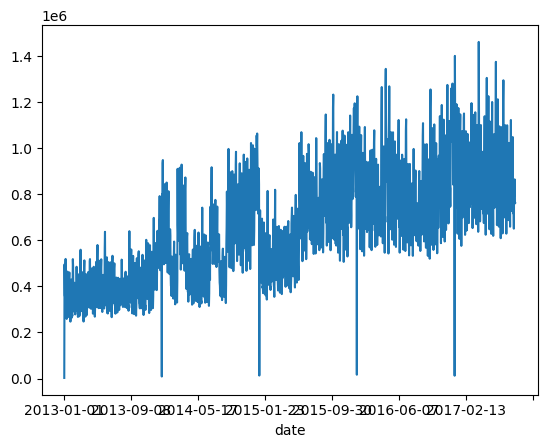

In [5]:
train_data.groupby('date')['sales'].sum().plot()  # Daily sales trend


# Data Pre-Processing

In [6]:
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

In [7]:
train_data['day_of_week'] = train_data['date'].dt.dayofweek
train_data['month'] = train_data['date'].dt.month
train_data['year'] = train_data['date'].dt.year

In [8]:
train_data = train_data.merge(stores[['store_nbr', 'type']], how='left', on='store_nbr')

In [9]:
train_data['sales'] = np.clip(train_data['sales'], None, train_data['sales'].quantile(0.99))